In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [79]:
data = pd.read_csv('G:/DEPI/Depi_Amit_AI_BNS3/Sources/Machine_Learning/session2/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<Figure size 300x300 with 0 Axes>

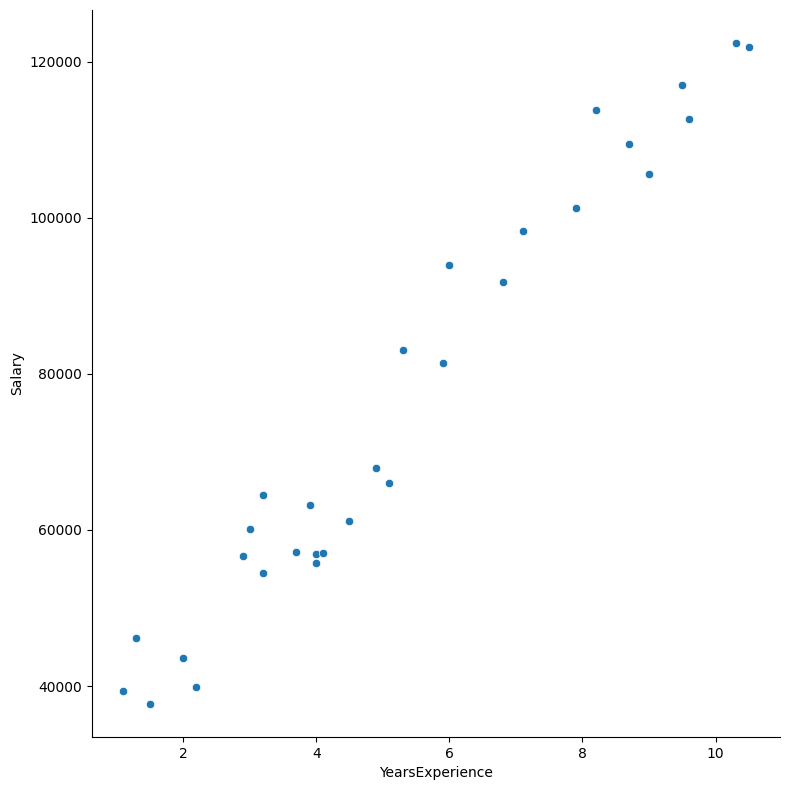

In [80]:
plt.figure(figsize=( 3,3))
sns.pairplot(data, x_vars=["YearsExperience"], y_vars=["Salary"], size=8, kind="scatter")
plt.show()

In [81]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [83]:
my_model = LinearRegression()
my_model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


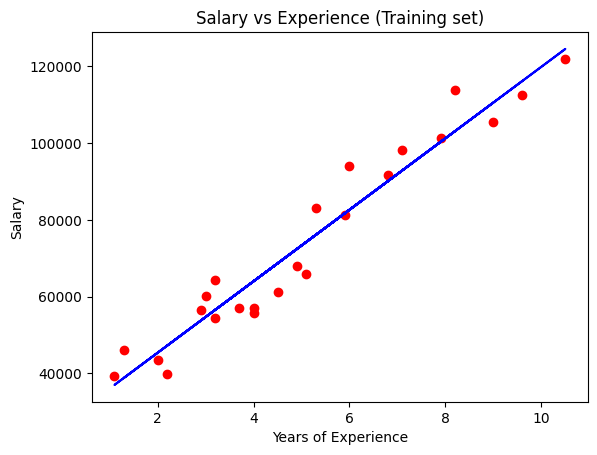

In [84]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, my_model.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [85]:
y_pred = my_model.predict(x_test)

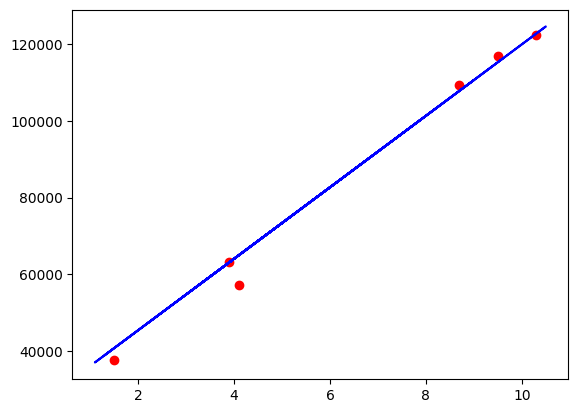

In [86]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, my_model.predict(x_train), color='blue')
 

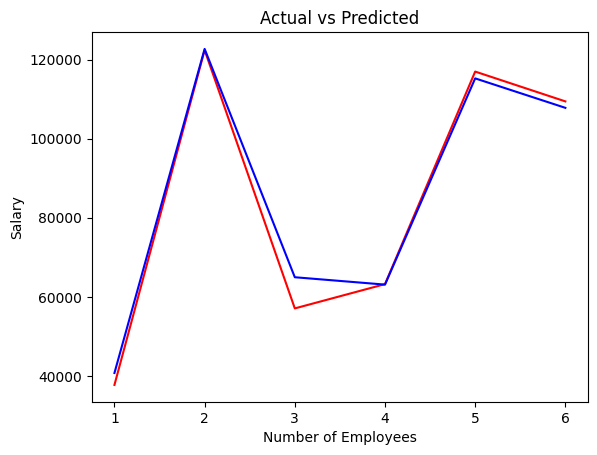

In [87]:
c = [i for i in range (1,len(y_test)+1)]
plt.plot(c,y_test,color='red')
plt.plot(c,y_pred,color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Number of Employees')
plt.ylabel('Salary')
plt.show()

In [88]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [89]:
mse = mean_squared_error(y_test,y_pred)
mse

12823412.298126549

In [90]:
rms = np.sqrt(mse)
rms

np.float64(3580.979237321343)

In [91]:
rsq = r2_score(y_test,y_pred)
rsq

0.988169515729126

In [92]:
my_model.intercept_ #b

np.float64(26780.09915062818)

In [93]:
my_model.coef_  #w

array([9312.57512673])

In [94]:
y_hat = 9312.57*1.1+26780.1
y_hat

37023.926999999996

In [95]:
39343.0-y_hat

2319.073000000004

In [96]:
y_hat = 9312.57*1.3+26780.1
y_hat

38886.441

In [97]:
46205.0-y_hat

7318.559000000001

In [98]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)
#%%
# Intecept and coeff of the line
print('Intercept of the model:',my_model.intercept_)
print('Coefficient of the line:',my_model.coef_)
 
y_hat = 9357 * 7 +  26089
print(y_hat)
 

mean squared error : 12823412.298126549
r square : 0.988169515729126
Intercept of the model: 26780.09915062818
Coefficient of the line: [9312.57512673]
91588


In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [101]:
poly = PolynomialFeatures(degree=6)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

In [102]:
x_poly_train

array([[1.00000000e+00, 9.60000000e+00, 9.21600000e+01, 8.84736000e+02,
        8.49346560e+03, 8.15372698e+04, 7.82757790e+05],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03, 4.09600000e+03],
       [1.00000000e+00, 5.30000000e+00, 2.80900000e+01, 1.48877000e+02,
        7.89048100e+02, 4.18195493e+03, 2.21643611e+04],
       [1.00000000e+00, 7.90000000e+00, 6.24100000e+01, 4.93039000e+02,
        3.89500810e+03, 3.07705640e+04, 2.43087456e+05],
       [1.00000000e+00, 2.90000000e+00, 8.41000000e+00, 2.43890000e+01,
        7.07281000e+01, 2.05111490e+02, 5.94823321e+02],
       [1.00000000e+00, 5.10000000e+00, 2.60100000e+01, 1.32651000e+02,
        6.76520100e+02, 3.45025251e+03, 1.75962878e+04],
       [1.00000000e+00, 3.20000000e+00, 1.02400000e+01, 3.27680000e+01,
        1.04857600e+02, 3.35544320e+02, 1.07374182e+03],
       [1.00000000e+00, 4.50000000e+00, 2.02500000e+01, 9.11250000e+01,
        4.10062500e+02, 1

In [103]:
poly_model = LinearRegression()
poly_model.fit(x_poly_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [104]:
y_poly_pred = poly_model.predict(x_poly_train)

In [105]:
y_poly_test = poly_model.predict(x_poly_test)

In [106]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = poly_model.predict(x_range_poly)

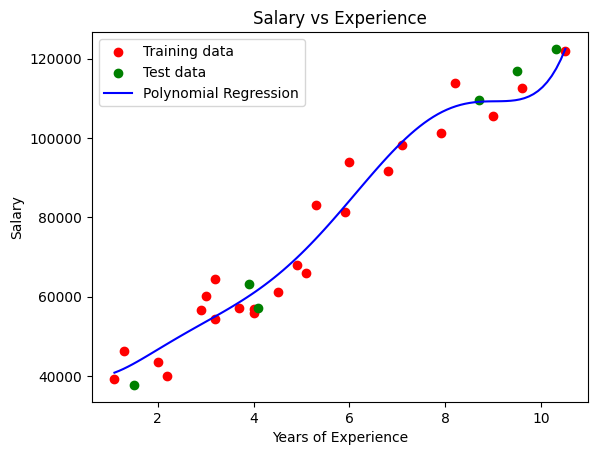

In [107]:
plt.scatter(x_train, y_train, color='red', label='Training data')
plt.scatter(x_test, y_test, color='green', label='Test data')
plt.plot(x_range, y_range_pred, color='blue', label='Polynomial Regression')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()